In [9]:
! pip install scipy

In [10]:
! pip install matplotlib==3.1.0

In [1]:
from itertools import combinations

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("../Files/bank-additional-clean-nonulls.csv", index_col = 0)
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


In [4]:
# Medidas de centralización

# Media

df_ingresos = df['income'].mean()

# Mediana
df_ingresos_mediana = df['income'].median()

# Moda
df_ingresos_moda = df['income'].mode()


In [5]:
# Medidas de dispersión

media_ingresos = df['income'].mean()

# Varianza

varianza_ingresos = df['income'].var()

# Desviación estándar
desviacion_estandar_ingresos = df['income'].std()

print(f'La media de los ingresos de los clientes es {np.round(media_ingresos,2)}')
print(f'La varianza de los ingresos de los clientes es: {np.round(varianza_ingresos,2)}')
print(f'La desviación estándar de los ingresos de los clientes es: {np.round(desviacion_estandar_ingresos,2)}')

La media de los ingresos de los clientes es 93241.2
La varianza de los ingresos de los clientes es: 2550079937.2
La desviación estándar de los ingresos de los clientes es: 50498.32


In [6]:
# Medidas de correlación:
# - Spearman: relación no lineal entre las variables
# - Pearson: relación lineal entre las variables, si cambia una, cambia la otra
# - Kendall: relación de orden entre las variables

# Combinaciones de variables numéricas

numericas = df.select_dtypes(include=[np.number]).columns

numericas

# usar el método combinations
combinaciones = list(combinations(numericas, 2))
combinaciones

[('income', 'kidhome'),
 ('income', 'teenhome'),
 ('income', 'numwebvisitsmonth'),
 ('income', 'duration'),
 ('income', 'campaign'),
 ('income', 'previous'),
 ('income', 'empvarrate'),
 ('income', 'conspriceidx'),
 ('income', 'consconfidx'),
 ('income', 'latitude'),
 ('income', 'longitude'),
 ('income', 'contact_year'),
 ('income', 'age'),
 ('income', 'euribor3m'),
 ('income', 'pdays'),
 ('kidhome', 'teenhome'),
 ('kidhome', 'numwebvisitsmonth'),
 ('kidhome', 'duration'),
 ('kidhome', 'campaign'),
 ('kidhome', 'previous'),
 ('kidhome', 'empvarrate'),
 ('kidhome', 'conspriceidx'),
 ('kidhome', 'consconfidx'),
 ('kidhome', 'latitude'),
 ('kidhome', 'longitude'),
 ('kidhome', 'contact_year'),
 ('kidhome', 'age'),
 ('kidhome', 'euribor3m'),
 ('kidhome', 'pdays'),
 ('teenhome', 'numwebvisitsmonth'),
 ('teenhome', 'duration'),
 ('teenhome', 'campaign'),
 ('teenhome', 'previous'),
 ('teenhome', 'empvarrate'),
 ('teenhome', 'conspriceidx'),
 ('teenhome', 'consconfidx'),
 ('teenhome', 'latitude

In [7]:
df_corr = df.corr( method = "pearson", numeric_only=True)
df_corr

,income,kidhome,teenhome,numwebvisitsmonth,duration,campaign,previous,empvarrate,conspriceidx,consconfidx,latitude,longitude,contact_year,age,euribor3m,pdays
income,1.000000,0.001350,0.006480,0.002500,-0.002761,-0.003736,-0.003207,-0.008640,-0.011102,0.001571,-0.004433,0.000360,-0.003660,0.001155,-0.004221,0.008985
kidhome,0.001350,1.000000,-0.001352,-0.005629,-0.000759,-0.006733,-0.000851,-0.004026,0.001129,-0.002109,-0.002123,0.002349,-0.006110,0.001143,-0.005811,0.007374
teenhome,0.006480,-0.001352,1.000000,-0.002803,-0.005937,0.000802,-0.003012,0.001431,0.004037,0.000989,-0.001514,-0.001410,-0.012731,-0.001151,-0.000213,-0.000678
numwebvisitsmonth,0.002500,-0.005629,-0.002803,1.000000,0.000750,0.004470,-0.001967,-0.006914,-0.004197,0.006740,0.002851,-0.002244,0.006015,-0.004294,-0.004435,0.000028
duration,-0.002761,-0.000759,-0.005937,0.000750,1.000000,-0.071956,0.021285,-0.027158,0.005825,-0.007631,-0.004131,0.003563,-0.002421,-0.000744,-0.033776,-0.001628
campaign,-0.003736,-0.006733,0.000802,0.004470,-0.071956,1.000000,-0.079603,0.152084,0.127981,-0.012867,-0.009589,-0.000568,-0.005429,0.003961,0.123716,-0.001138
previous,-0.003207,-0.000851,-0.003012,-0.001967,0.021285,-0.079603,1.000000,-0.419110,-0.199708,-0.048914,0.011632,-0.010392,0.000837,0.027596,-0.431478,0.004409
empvarrate,-0.008640,-0.004026,0.001431,-0.006914,-0.027158,0.152084,-0.419110,1.000000,0.771397,0.192004,-0.008496,0.000301,0.003914,-0.004917,0.858271,-0.034251
conspriceidx,-0.011102,0.001129,0.004037,-0.004197,0.005825,0.127981,-0.199708,0.771397,1.000000,0.055530,-0.004180,-0.003114,0.008587,-0.001555,0.594990,-0.029937
consconfidx,0.001571,-0.002109,0.000989,0.006740,-0.007631,-0.012867,-0.048914,0.192004,0.055530,1.000000,-0.006520,0.007739,-0.004032,0.121770,0.234470,-0.040640


In [8]:
import seaborn as sns
sns.__version__

'0.13.2'

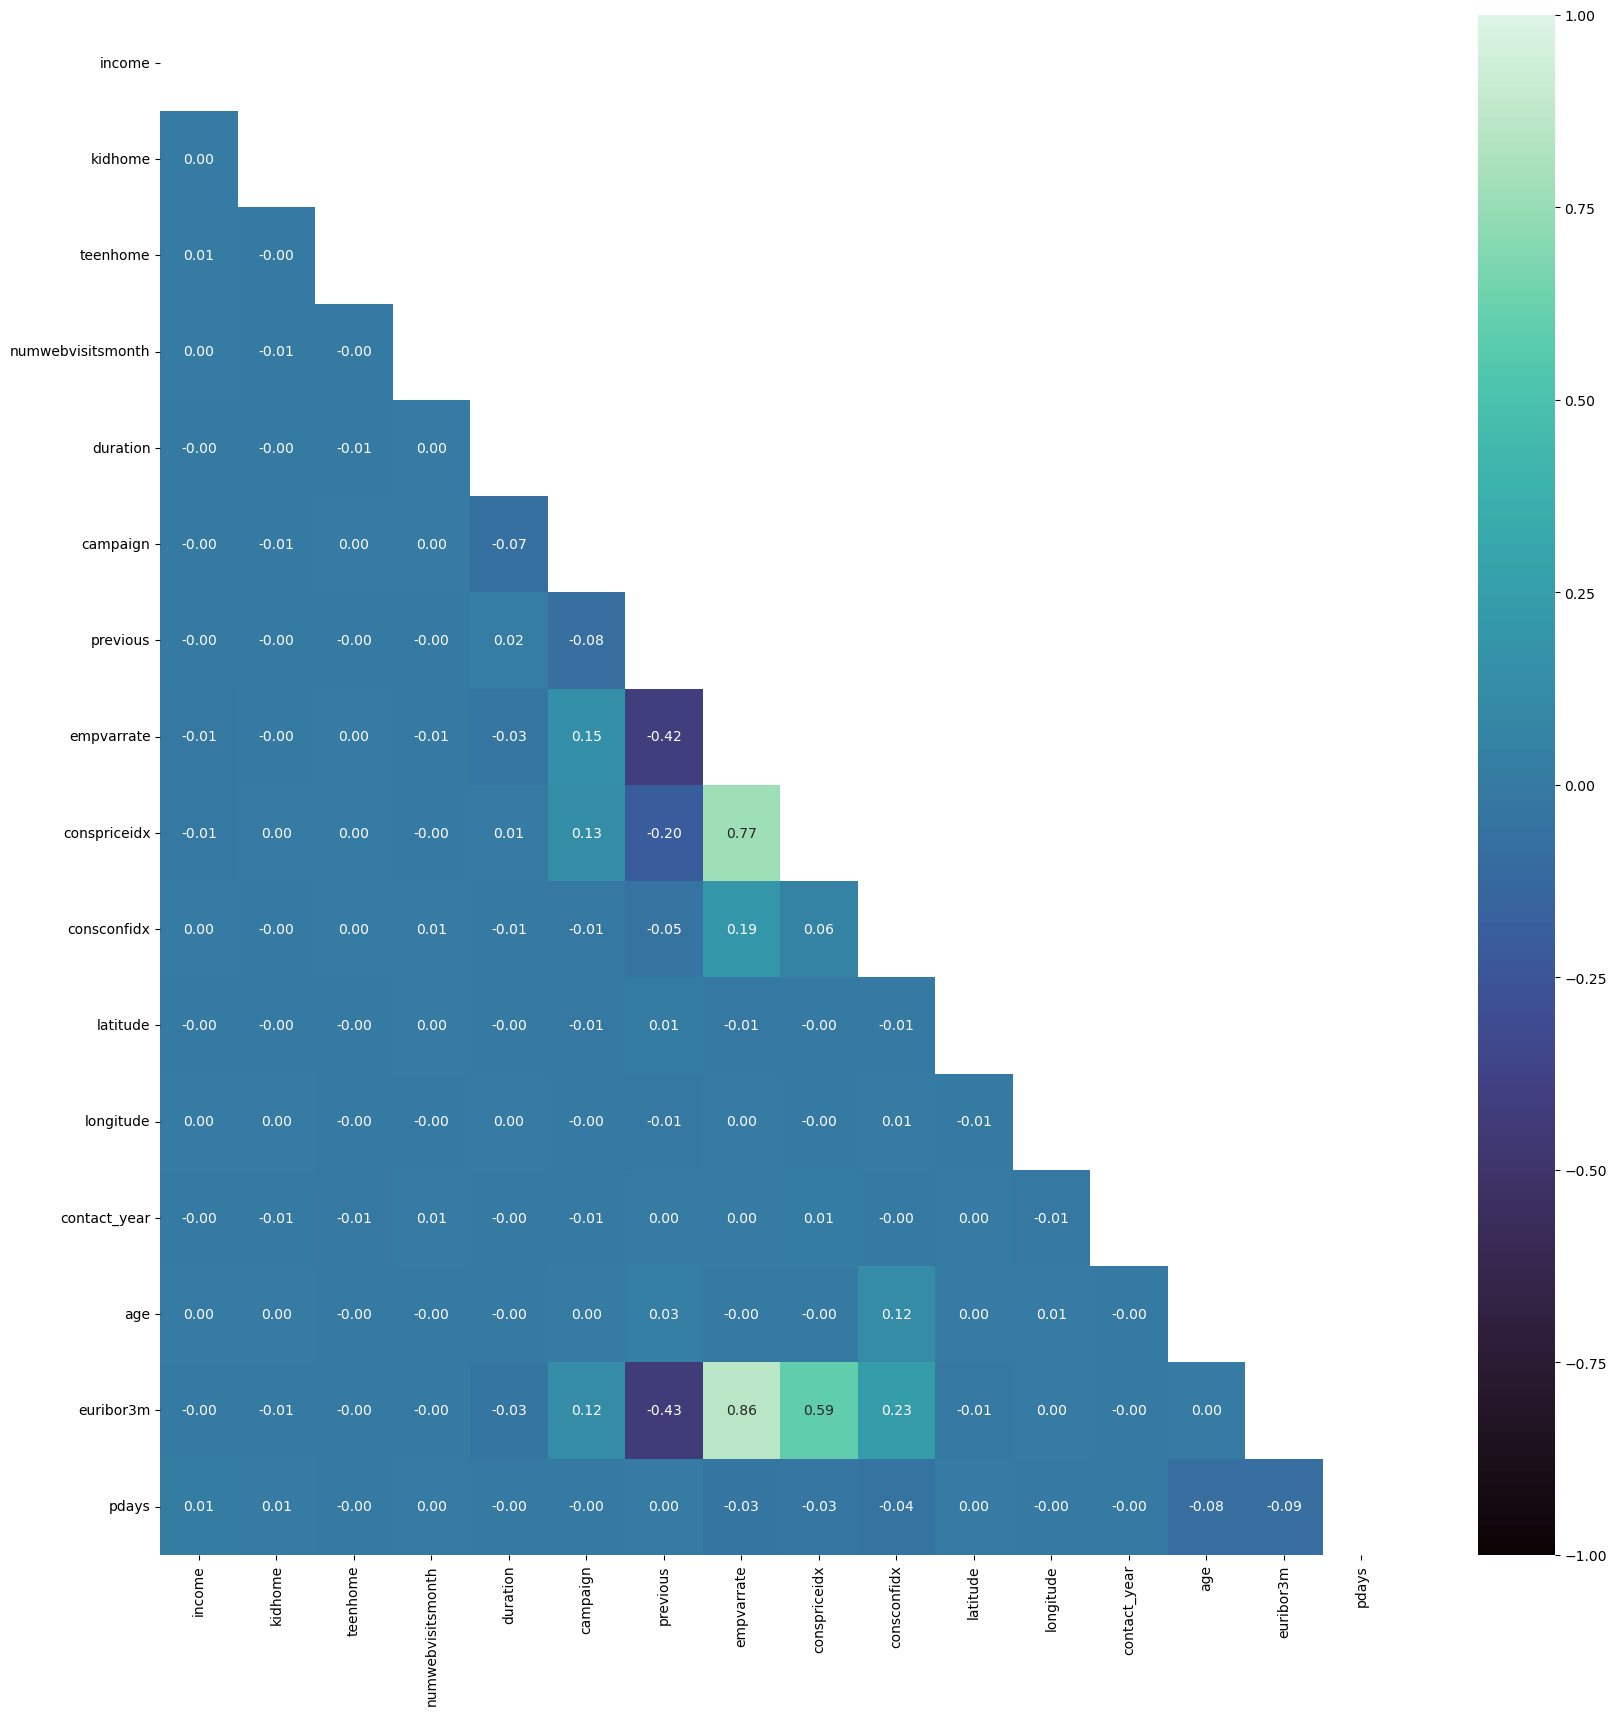

In [9]:
plt.figure(figsize=(20,20))

#Creamos una matriz booleana de mascara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr,
            annot=True,
            fmt =".2f",
            cmap="mako",
            vmax=1,
            vmin=-1,
            mask=mask);

#Correlacion debil r < 0.3
#Correlacion moderada r de 0.3 a 0.7
#Correlacion fuerte r>0.7

In [ ]:
# Medidas categóricas

# Frecuencia absoluta
frecuencia_absoluta = df['marital'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df['marital'].value_counts(normalize=True)*100

# Tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Estado Civil':frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa %':frecuencia_relativa
})


tabla_frecuencias

,Estado Civil,Frecuencia Absoluta,Frecuencia Relativa %
marital,,,
married,married,25999,60.462791
single,single,12105,28.151163
divorced,divorced,4811,11.188372
noviembre,noviembre,85,0.197674


In [ ]:
tabla_contingencia_1 = pd.crosstab(df['marital'], df['education'], normalize=True)*100

tabla_contingencia_1

education,Unknown,basic 4y,basic 6y,basic 9y,high school,illiterate,professional course,university degree
marital,,,,,,,,
divorced,0.444186,1.200000,0.441860,1.376744,2.883721,0.004651,1.602326,3.234884
married,2.576744,7.827907,4.286047,10.072093,12.493023,0.034884,7.662791,15.509302
noviembre,0.020930,0.013953,0.016279,0.020930,0.034884,0.000000,0.016279,0.074419
single,1.160465,1.088372,0.804651,3.202326,7.669767,0.002326,3.455814,10.767442
